First few rows of the dataset:
  Customer ID               Category                 Item  Quantity  \
0   CUST_0159              Groceries                 Milk         1   
1   CUST_0017      Friend Activities  Dinner with Friends         2   
2   CUST_0094  Housing and Utilities           Water Bill         1   
3   CUST_0162                Fitness           Yoga Class         5   
4   CUST_0129                  Gifts              Flowers         3   

   Price Per Unit  Total Spent  Payment Method    Location Transaction Date  
0            1.28         1.28      Debit Card  Mobile App       2024-11-13  
1           74.69       149.39      Debit Card    In-store       2023-05-04  
2           76.06        76.06  Digital Wallet  Mobile App       2023-12-16  
3           11.24        56.18            Cash    In-store       2024-01-28  
4           43.71       131.12      Debit Card    In-store       2023-07-28  

Summary of the dataset:
           Quantity  Price Per Unit    Total Spen

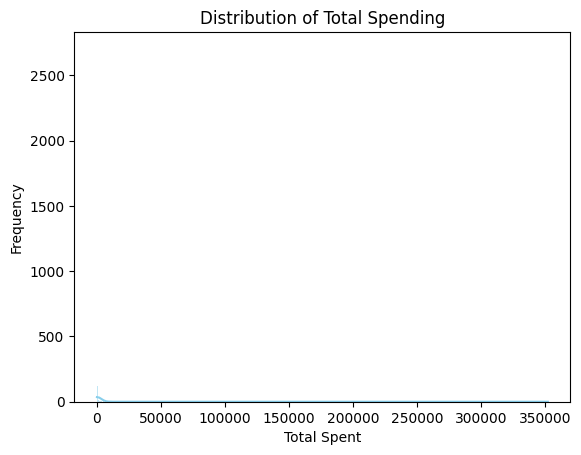

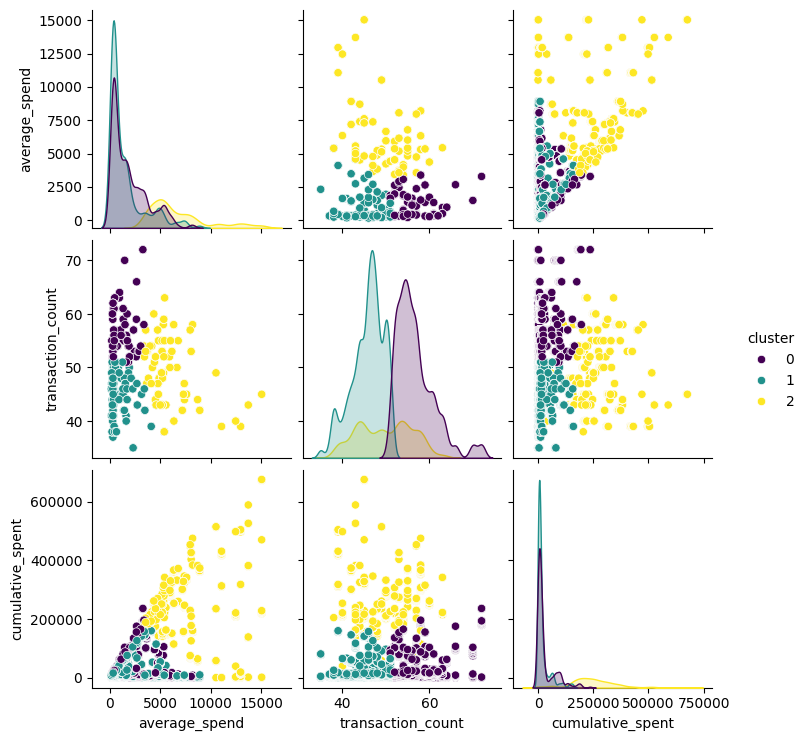

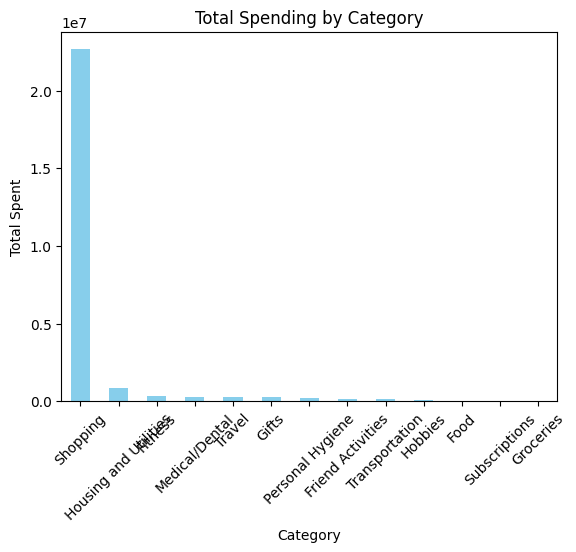

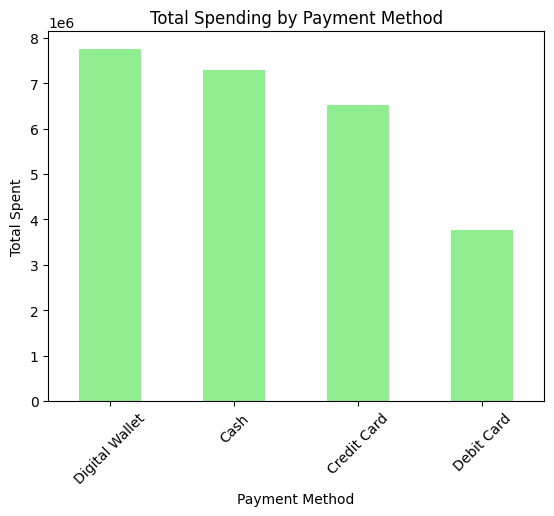

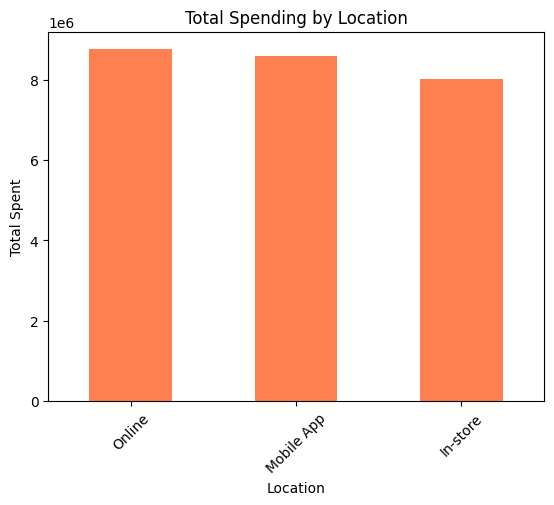


Average spending by cluster:
cluster
0     1158.607335
1      913.652090
2    10054.190499
Name: Total Spent, dtype: float64


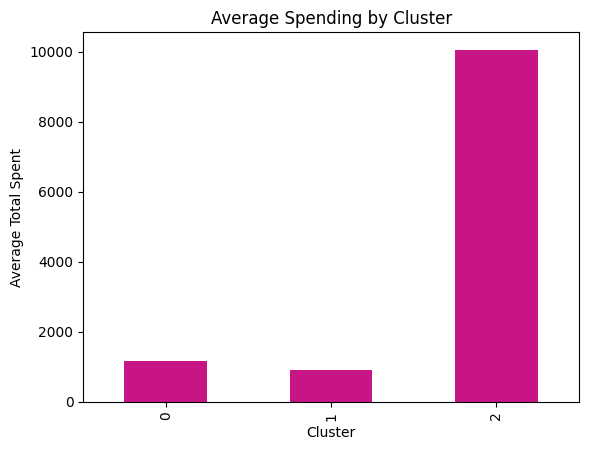

C:\Users\beanb\AppData\Local\Temp\ipykernel_85752\4014607813.py:144: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spending_by_segment = df.groupby('Spending Segment')['Total Spent'].sum().sort_values(ascending=False)


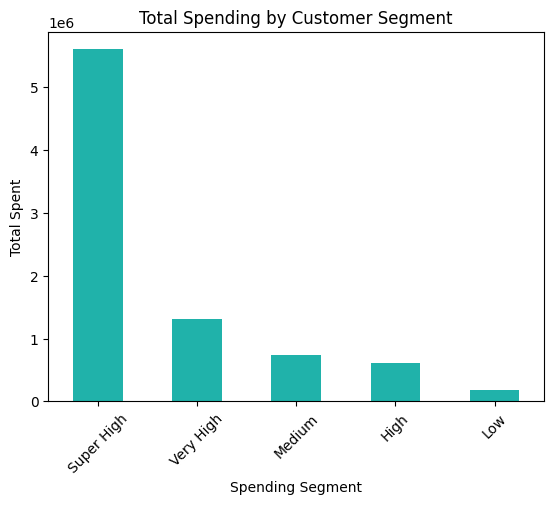

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load dataset
df = pd.read_csv('data/consumer_spending_data.csv')

# EDA (Exploratory Data Analysis)
def perform_eda(df):
    # Display first few rows of the dataset
    print("First few rows of the dataset:")
    print(df.head())

    # Summary of the dataset
    print("\nSummary of the dataset:")
    print(df.describe())

    # Check for missing values
    print("\nMissing values per column:")
    print(df.isnull().sum())

    # Data types of columns
    print("\nData types of columns:")
    print(df.dtypes)

    # Plot distribution of total spending
    sns.histplot(df['Total Spent'], kde=True, color='skyblue')
    plt.title('Distribution of Total Spending')
    plt.xlabel('Total Spent')
    plt.ylabel('Frequency')
    plt.show()

# Perform EDA
perform_eda(df)

# Feature Engineering
def feature_engineering(df):
    # Convert dates and extract year/month
    df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
    df['transaction_month'] = df['Transaction Date'].dt.month
    df['transaction_year'] = df['Transaction Date'].dt.year

    # Cumulative spending calculation
    df['cumulative_spent'] = df.groupby('Customer ID')['Total Spent'].cumsum()

    # Average spend per customer
    df['average_spend'] = df.groupby('Customer ID')['Total Spent'].transform('mean')

    # Transaction count per customer
    df['transaction_count'] = df.groupby('Customer ID')['Transaction Date'].transform('count')

    # Customer lifetime value
    df['customer_lifetime_value'] = df.groupby('Customer ID')['Total Spent'].transform('sum')

    # High spending indicator
    df['high_spend'] = df['Total Spent'].apply(lambda x: 1 if x > df['Total Spent'].mean() else 0)

# Apply feature engineering
feature_engineering(df)

# Clustering
def perform_clustering(df):
    # Scaling the data
    features = ['average_spend', 'transaction_count', 'cumulative_spent']
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df[features])

    # Apply k-means clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    df['cluster'] = kmeans.fit_predict(scaled_features)

# Perform clustering
perform_clustering(df)

# Data Visualization
def visualize_data(df):
    # Plotting Clusters
    sns.pairplot(df, vars=['average_spend', 'transaction_count', 'cumulative_spent'], hue='cluster', palette='viridis')
    plt.show()

    # Group by category and sum total spending
    spending_by_category = df.groupby('Category')['Total Spent'].sum().sort_values(ascending=False)

    # Plot total spending by category
    spending_by_category.plot(kind='bar', color='skyblue')
    plt.title('Total Spending by Category')
    plt.xlabel('Category')
    plt.ylabel('Total Spent')
    plt.xticks(rotation=45)
    plt.show()

    # Group by payment method and sum total spending
    spending_by_payment_method = df.groupby('Payment Method')['Total Spent'].sum().sort_values(ascending=False)

    # Plot total spending by payment method
    spending_by_payment_method.plot(kind='bar', color='lightgreen')
    plt.title('Total Spending by Payment Method')
    plt.xlabel('Payment Method')
    plt.ylabel('Total Spent')
    plt.xticks(rotation=45)
    plt.show()

    # Group by location and sum total spending
    spending_by_location = df.groupby('Location')['Total Spent'].sum().sort_values(ascending=False)

    # Plot total spending by location
    spending_by_location.plot(kind='bar', color='coral')
    plt.title('Total Spending by Location')
    plt.xlabel('Location')
    plt.ylabel('Total Spent')
    plt.xticks(rotation=45)
    plt.show()

# Visualize data
visualize_data(df)

# Example: Analyzing clusters by spending behavior
def analyze_cluster_spending(df):
    cluster_spending = df.groupby('cluster')['Total Spent'].mean()
    print("\nAverage spending by cluster:")
    print(cluster_spending)

    # Plot average spending by cluster
    cluster_spending.plot(kind='bar', color='mediumvioletred')
    plt.title('Average Spending by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Average Total Spent')
    plt.show()

# Analyze cluster spending
analyze_cluster_spending(df)

# Segment customers based on total spending
def segment_customers(df):
    customer_segments = pd.cut(df['Total Spent'], bins=[0, 100, 500, 1000, 5000, 100000],
                               labels=['Low', 'Medium', 'High', 'Very High', 'Super High'])

    df['Spending Segment'] = customer_segments

    # Group by segment and analyze total spending
    spending_by_segment = df.groupby('Spending Segment')['Total Spent'].sum().sort_values(ascending=False)

    # Plot total spending by segment
    spending_by_segment.plot(kind='bar', color='lightseagreen')
    plt.title('Total Spending by Customer Segment')
    plt.xlabel('Spending Segment')
    plt.ylabel('Total Spent')
    plt.xticks(rotation=45)
    plt.show()

# Segment and analyze customers
segment_customers(df)
